# Porównanie czasów przetwarzania danych w DataFrame

In [0]:
import pandas as pd
import numpy as np

# Generowanie zbioru testowego

In [0]:
COUNT = 50000
df = pd.DataFrame( { x : np.random.randint(1000, size=COUNT) for x in 'ABC' } )

In [3]:
df.sample(n=10)

,A,B,C
18949,950,843,701
24739,470,926,159
6963,678,395,234
45913,578,891,937
21696,535,23,773
35401,430,342,572
33301,667,270,60
267,4,507,425
39242,981,757,599
47518,513,897,618


### Deklaracja metody przetwarzającej dane z kolumn

In [0]:
def sub_sqrt(df):
    return  np.sqrt(df.A)-np.sqrt(df.B)-np.sqrt(df.C)

# Apply

In [5]:
%%timeit -r 1 -n 10
df['sub_sqrt']=df.apply(sub_sqrt,axis=1)

10 loops, best of 1: 2.68 s per loop


# Dask

Konieczność instalacji: `pip install dask`

In [0]:
import dask.dataframe as dd
ddf = dd.from_pandas(df, npartitions=5)

In [7]:
%%timeit -r 1 -n 10
ddf ['sub_sqrt'] = ddf.map_partitions(sub_sqrt,meta=(None, 'int64')).compute()

10 loops, best of 1: 49 ms per loop


# Swifter

In [0]:
import swifter

Konieczność instalacji: `pip install swifter`

In [0]:
def sub_sqrt(a,b,c):
    return  np.sqrt(a)-np.sqrt(b)-np.sqrt(c)

In [10]:
%%timeit -r 1 -n 10
df['sub_sqrt']=df.swifter.apply(lambda row:sub_sqrt(row.A,row.B,row.C),axis=1)

10 loops, best of 1: 5.39 ms per loop


# Wektoryzacja funkcji

In [11]:
%%timeit -r 1 -n 10
df ['sub_sqrt']=sub_sqrt(df.A,df.B,df.C)

10 loops, best of 1: 2.17 ms per loop


Porównanie

In [12]:
df_result = pd.DataFrame({
    "Metoda" : ["Apply", "Dask", "Swifter", "Wektoryzacja"],
    "Czas" : [2.57*1000, 47, 5.18, 2.89]
})
df_result

,Metoda,Czas
0,Apply,2570.00
1,Dask,47.00
2,Swifter,5.18
3,Wektoryzacja,2.89


Text(0.5, 1.0, 'Czas przetwarzania - skala logarytmiczna')

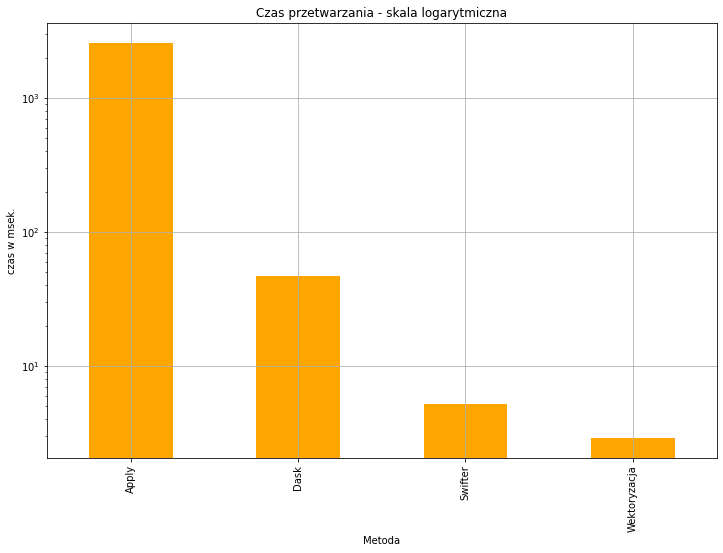

In [13]:
ax = df_result.plot(kind='bar', x='Metoda', y='Czas', legend=False, grid=True, figsize=(12,8), logy=True, color='orange')
ax.set_ylabel('czas w msek.')
ax.set_title('Czas przetwarzania - skala logarytmiczna')